In [109]:
import pandas as pd

In [110]:
pd.__version__  

'2.2.2'

In [111]:
data = pd.read_excel(r"C:\Users\anish\Downloads\Rawdata.xlsx")

In [112]:
data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [113]:
data["Name"]

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

In [114]:
data["Name"] = data["Name"].str.replace(r"\W", "", regex=True)
data["Name"]

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [115]:
data


,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy,Testing,45' yr,Bangalore,10%%000,<3
2,Umar,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [116]:
data["Age"] = data["Age"].str.extract(r"(\d+)")

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [118]:
data["Salary"] = data["Salary"].str.replace(r"\W", "", regex=True)
data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34,Mumbai,5000,2+
1,Teddy,Testing,45,Bangalore,10000,<3
2,Umar,Dataanalyst^^#,NaN,NaN,15000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5+ year
5,Kim,NLP,55,Delhi,60000,10+


In [119]:
data[("Domain")] = data[("Domain" )].str.replace(r"\W", "", regex=True)
data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2+
1,Teddy,Testing,45,Bangalore,10000,<3
2,Umar,Dataanalyst,NaN,NaN,15000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5+ year
5,Kim,NLP,55,Delhi,60000,10+


In [120]:
clean_data = data.copy()

In [121]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2+
1,Teddy,Testing,45,Bangalore,10000,<3
2,Umar,Dataanalyst,NaN,NaN,15000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5+ year
5,Kim,NLP,55,Delhi,60000,10+


In [122]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [123]:
clean_data.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [124]:
import numpy as np

In [125]:
clean_data["Age"] = clean_data["Age"].fillna(np.mean(pd.to_numeric(clean_data["Age"])))

In [126]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2+
1,Teddy,Testing,45,Bangalore,10000,<3
2,Umar,Dataanalyst,50.25,NaN,15000,4> yrs
3,Jane,Analytics,50.25,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5+ year
5,Kim,NLP,55,Delhi,60000,10+


In [127]:
clean_data["Exp"] = clean_data["Exp"].str.extract(r"(\d+)")
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [128]:
clean_data["Exp"] = clean_data["Exp"].fillna(np.mean(pd.to_numeric(clean_data["Exp"])))


In [129]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [131]:
clean_data["Location"] = clean_data["Location"].fillna(clean_data["Location"].mode()[0])
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [132]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [139]:
clean_data["Age"] = clean_data["Age"].astype(int)
clean_data["Exp"] = clean_data["Exp"].astype(int)
clean_data["Salary"] = clean_data["Salary"].astype(int)

In [140]:
clean_data["Name"] = clean_data["Name"].astype("category")
clean_data["Domain"] = clean_data["Domain"].astype("category")
clean_data["Location"] = clean_data["Location"].astype("category")


In [141]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int32   
 5   Exp       6 non-null      int32   
dtypes: category(3), int32(3)
memory usage: 866.0 bytes


In [145]:
clean_data.to_csv(r"C:\Users\anish\Downloads\Cleaneddata.csv", index=False)

In [143]:
import os

In [146]:
os.getcwd()

'c:\\Users\\anish\\Data Science with Gen AI\\Task Codes'

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\anish\AppData\Local\Temp\ipykernel_32464\1311441234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  vis1 = sns.distplot(clean_data["Salary"], kde=True)


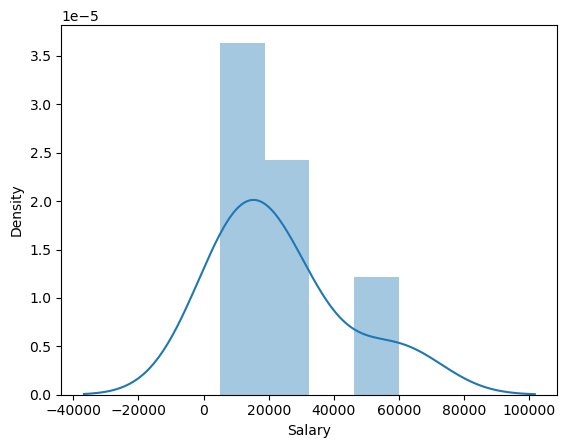

In [148]:
vis1 = sns.distplot(clean_data["Salary"], kde=True)
plt.show()

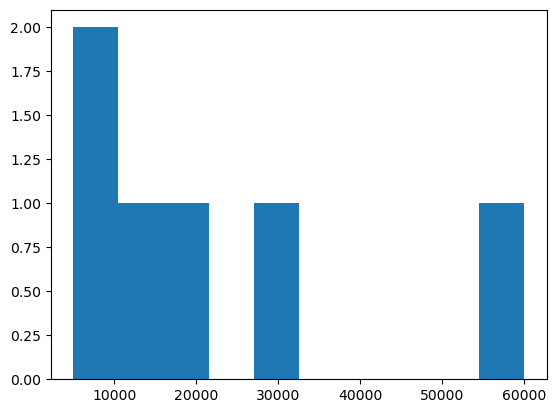

In [149]:
vis2 = plt.hist(clean_data['Salary'])

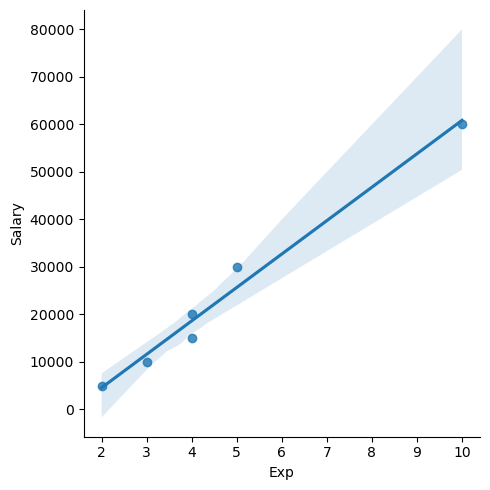

In [150]:
vis4 = sns.lmplot(data=clean_data,x = 'Exp', y='Salary')

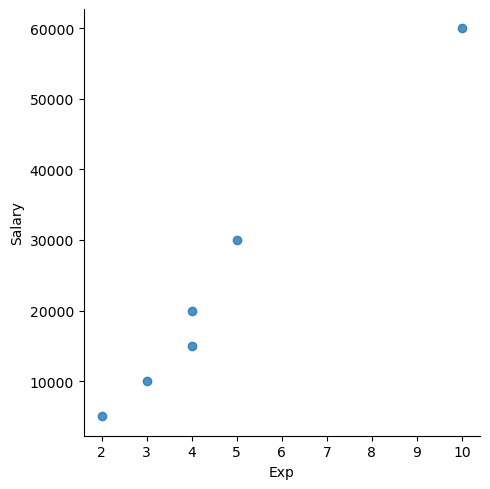

In [151]:
vis5 = sns.lmplot(data=clean_data,x = 'Exp', y='Salary', fit_reg = False)